In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math 
import time
import datetime

In [3]:
df=pd.read_csv('C:/Users/dell/Desktop/Data Science Project/covid_dataset.csv')  
df

,Date,Province Old,Suspected Cases Last Date,Suspected Cases Last 24 Hrs,Suspected Cases Cumulative,Lab Tests Last 24 Hrs,Lab Tests Cumulative,Confirmed Cases Last Date,Confirmed Cases Last 24 Hrs,Confirmed Cases Cumulative,...,Confirmed HW - Active Nurses,Confirmed HW - Active Others,Confirmed HW - Active Total,Confirmed HW - Active Isolation,Confirmed HW - Active Hospital,Confirmed HW - Active Hospital Stable,Confirmed HW - Active Hospital Ventilator,Confirmed HW - Active Recovered,Confirmed HW - Active Deaths,Test
0,4/4/2020,AJK,322,21,343,21,343,9,2,11,...,0,0,0,0,0,0,0,0,0,NaN
1,4/4/2020,Balochistan,2171,230,2401,0,2401,169,6,175,...,0,0,0,0,0,0,0,0,0,NaN
2,4/4/2020,GB,961,2,963,844,860,190,3,193,...,0,0,0,0,0,0,0,0,0,NaN
3,4/4/2020,ICT,2395,174,2569,174,2569,68,7,75,...,0,0,0,0,0,0,0,0,0,NaN
4,4/4/2020,KP,1938,431,2369,181,1624,311,32,343,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,5/22/2020,GB,7178,40,7310,171,7099,579,23,602,...,4,2,32,38,0,16,16,0,20,2.0
276,5/22/2020,ICT,30364,71,32126,1762,32126,1235,91,1326,...,62,46,50,158,142,3,3,0,12,1.0
277,5/22/2020,KP,43623,283,45049,1789,46762,6815,340,7155,...,186,70,169,425,230,22,22,0,170,3.0
278,5/22/2020,Punjab,162669,2487,165801,5931,191910,17382,1073,18455,...,93,93,103,289,73,106,106,0,110,0.0


# Performing data cleaning

## replacing NaN by 0

In [4]:
df['Test'] = df['Test'].replace(np.nan, 0)

In [5]:
df.head()

,Date,Province Old,Suspected Cases Last Date,Suspected Cases Last 24 Hrs,Suspected Cases Cumulative,Lab Tests Last 24 Hrs,Lab Tests Cumulative,Confirmed Cases Last Date,Confirmed Cases Last 24 Hrs,Confirmed Cases Cumulative,...,Confirmed HW - Active Nurses,Confirmed HW - Active Others,Confirmed HW - Active Total,Confirmed HW - Active Isolation,Confirmed HW - Active Hospital,Confirmed HW - Active Hospital Stable,Confirmed HW - Active Hospital Ventilator,Confirmed HW - Active Recovered,Confirmed HW - Active Deaths,Test
0,4/4/2020,AJK,322,21,343,21,343,9,2,11,...,0,0,0,0,0,0,0,0,0,0.0
1,4/4/2020,Balochistan,2171,230,2401,0,2401,169,6,175,...,0,0,0,0,0,0,0,0,0,0.0
2,4/4/2020,GB,961,2,963,844,860,190,3,193,...,0,0,0,0,0,0,0,0,0,0.0
3,4/4/2020,ICT,2395,174,2569,174,2569,68,7,75,...,0,0,0,0,0,0,0,0,0,0.0
4,4/4/2020,KP,1938,431,2369,181,1624,311,32,343,...,0,0,0,0,0,0,0,0,0,0.0


# Converting the provinces into strings

In [6]:
df['Province Old']=df['Province Old'].apply(str)
df

,Date,Province Old,Suspected Cases Last Date,Suspected Cases Last 24 Hrs,Suspected Cases Cumulative,Lab Tests Last 24 Hrs,Lab Tests Cumulative,Confirmed Cases Last Date,Confirmed Cases Last 24 Hrs,Confirmed Cases Cumulative,...,Confirmed HW - Active Nurses,Confirmed HW - Active Others,Confirmed HW - Active Total,Confirmed HW - Active Isolation,Confirmed HW - Active Hospital,Confirmed HW - Active Hospital Stable,Confirmed HW - Active Hospital Ventilator,Confirmed HW - Active Recovered,Confirmed HW - Active Deaths,Test
0,4/4/2020,AJK,322,21,343,21,343,9,2,11,...,0,0,0,0,0,0,0,0,0,0.0
1,4/4/2020,Balochistan,2171,230,2401,0,2401,169,6,175,...,0,0,0,0,0,0,0,0,0,0.0
2,4/4/2020,GB,961,2,963,844,860,190,3,193,...,0,0,0,0,0,0,0,0,0,0.0
3,4/4/2020,ICT,2395,174,2569,174,2569,68,7,75,...,0,0,0,0,0,0,0,0,0,0.0
4,4/4/2020,KP,1938,431,2369,181,1624,311,32,343,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,5/22/2020,GB,7178,40,7310,171,7099,579,23,602,...,4,2,32,38,0,16,16,0,20,2.0
276,5/22/2020,ICT,30364,71,32126,1762,32126,1235,91,1326,...,62,46,50,158,142,3,3,0,12,1.0
277,5/22/2020,KP,43623,283,45049,1789,46762,6815,340,7155,...,186,70,169,425,230,22,22,0,170,3.0
278,5/22/2020,Punjab,162669,2487,165801,5931,191910,17382,1073,18455,...,93,93,103,289,73,106,106,0,110,0.0


# general information and description of data

In [7]:
df.describe()

,Suspected Cases Last Date,Suspected Cases Last 24 Hrs,Suspected Cases Cumulative,Lab Tests Last 24 Hrs,Lab Tests Cumulative,Confirmed Cases Last Date,Confirmed Cases Last 24 Hrs,Confirmed Cases Cumulative,Deaths Last Date,Deaths Last 24 Hrs,...,Confirmed HW - Active Nurses,Confirmed HW - Active Others,Confirmed HW - Active Total,Confirmed HW - Active Isolation,Confirmed HW - Active Hospital,Confirmed HW - Active Hospital Stable,Confirmed HW - Active Hospital Ventilator,Confirmed HW - Active Recovered,Confirmed HW - Active Deaths,Test
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.00000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,19897.532143,953.828571,20965.242857,1069.032143,23946.571429,2238.200000,127.650000,2365.85000,47.264286,2.664286,...,22.935714,12.342857,29.271429,46.153571,27.139286,11.964286,6.257143,3.846429,10.678571,0.421429
std,30384.303370,1368.099120,31763.689244,1455.263509,36863.761554,3693.409169,207.809257,3880.22333,79.302706,4.190980,...,48.494571,18.097415,39.352345,87.837427,54.352479,25.176199,21.149874,8.480295,27.297188,1.126850
min,322.000000,0.000000,343.000000,0.000000,343.000000,9.000000,0.000000,11.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3093.250000,106.500000,3419.250000,136.750000,3079.750000,210.750000,6.750000,212.75000,2.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7552.000000,359.500000,8349.000000,396.000000,7755.000000,614.500000,43.500000,656.00000,9.000000,1.000000,...,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20989.250000,1137.000000,21985.500000,1478.500000,25553.250000,2433.000000,154.500000,2602.25000,48.500000,4.000000,...,16.000000,22.000000,50.750000,45.250000,23.000000,7.250000,0.000000,3.000000,4.000000,0.000000
max,162669.000000,7159.000000,165801.000000,6266.000000,191910.000000,18964.000000,1356.000000,19924.00000,351.000000,20.000000,...,285.000000,93.000000,169.000000,425.000000,266.000000,125.000000,125.000000,38.000000,170.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 54 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       280 non-null    object 
 1   Province Old                               280 non-null    object 
 2   Suspected Cases Last Date                  280 non-null    int64  
 3   Suspected Cases Last 24 Hrs                280 non-null    int64  
 4   Suspected Cases Cumulative                 280 non-null    int64  
 5   Lab Tests Last 24 Hrs                      280 non-null    int64  
 6   Lab Tests Cumulative                       280 non-null    int64  
 7   Confirmed Cases Last Date                  280 non-null    int64  
 8   Confirmed Cases Last 24 Hrs                280 non-null    int64  
 9   Confirmed Cases Cumulative                 280 non-null    int64  
 10   Deaths Last Date         

In [10]:
import matplotlib.pyplot as plt
def confirmed_cases(var,province,col):
    
    
 
    y = df[df['Province Old']==province][var]
    x = df[df['Province Old']==province]['Date']
    plt.figure(figsize=(16,4))
    plt.title("Plot of \"{}\" for {}".format(var,province),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color=col)
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()
    

In [11]:
def suspect(var,province,col):
    
    y = df[df['Province Old']==province][var]
    x = df[df['Province Old']==province]['Date']
  
    plt.figure(figsize=(15,4))
    plt.title("Plot of \"{}\" for {}".format(var,province),fontsize=18)
    # plotting the points 
    plt.plot(x, y,col)
  
    # naming the x axis
    plt.xlabel('Date')
    # naming the y axis
    plt.ylabel('Suspected Cases')
   
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)

    # function to show the plot
    plt.show()


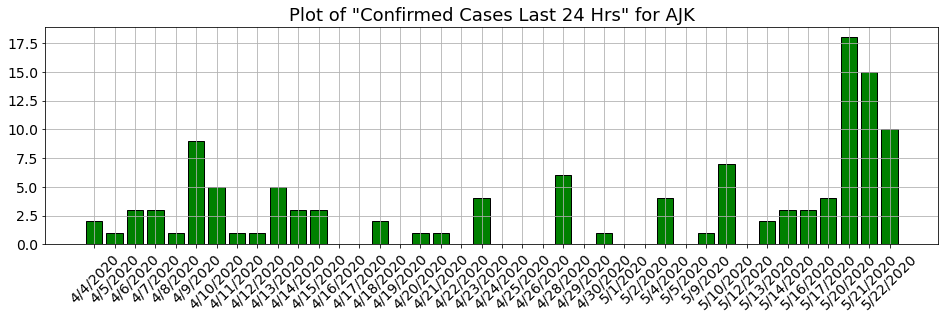

In [12]:
confirmed_cases('Confirmed Cases Last 24 Hrs','AJK','green')

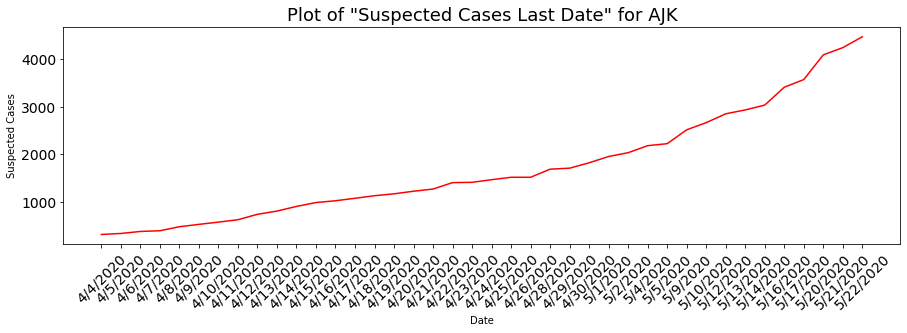

In [13]:
suspect('Suspected Cases Last Date','AJK','red')

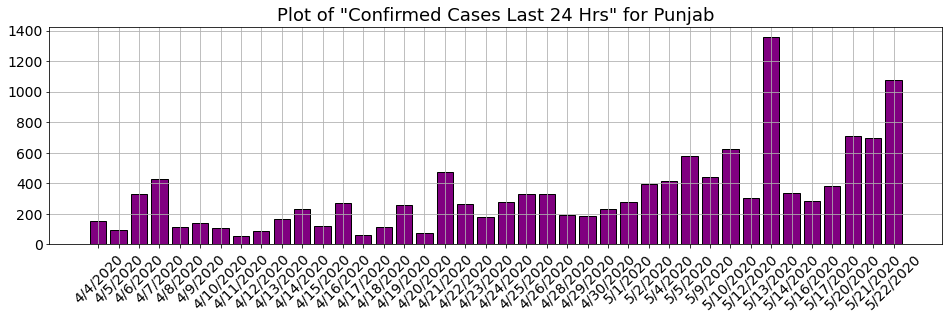

In [14]:
confirmed_cases('Confirmed Cases Last 24 Hrs','Punjab','purple')

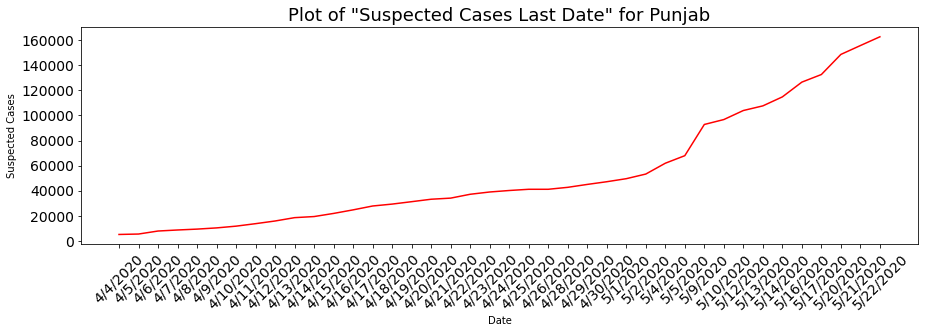

In [15]:
suspect('Suspected Cases Last Date','Punjab','red')

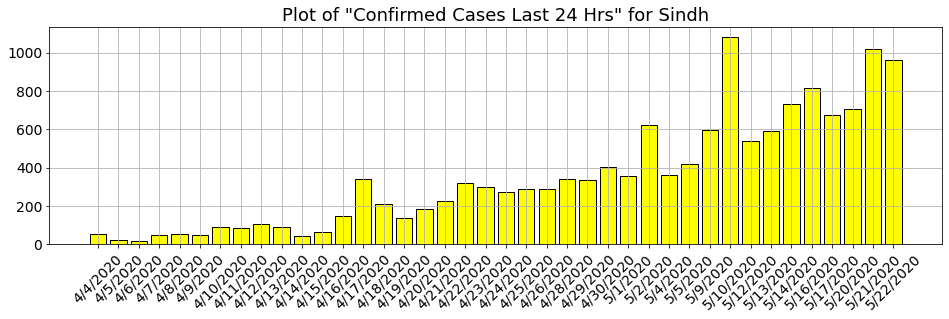

In [16]:
confirmed_cases('Confirmed Cases Last 24 Hrs','Sindh','yellow')

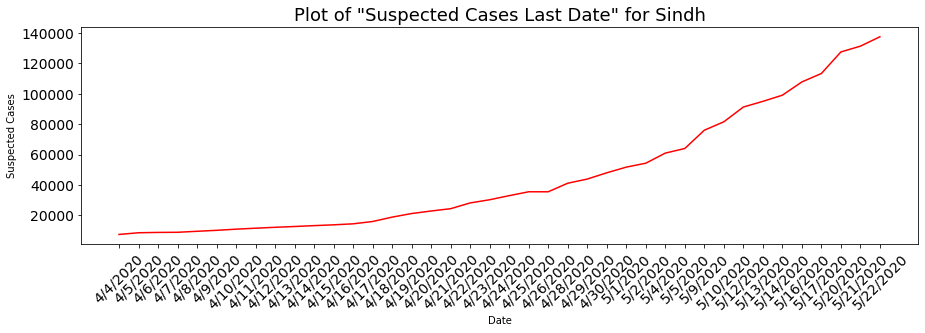

In [17]:
suspect('Suspected Cases Last Date','Sindh','red')

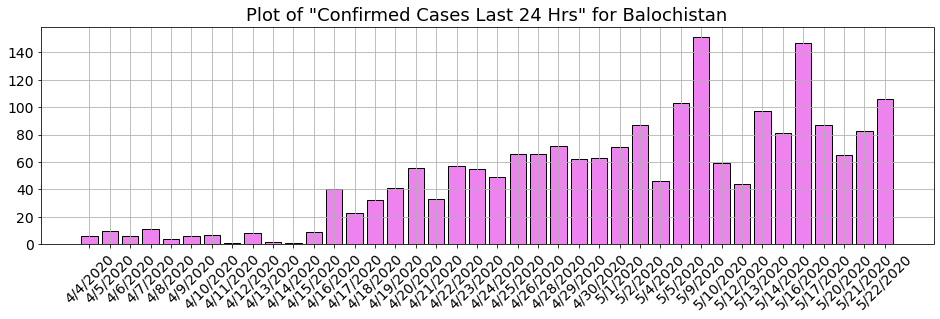

In [18]:
confirmed_cases('Confirmed Cases Last 24 Hrs','Balochistan','violet')

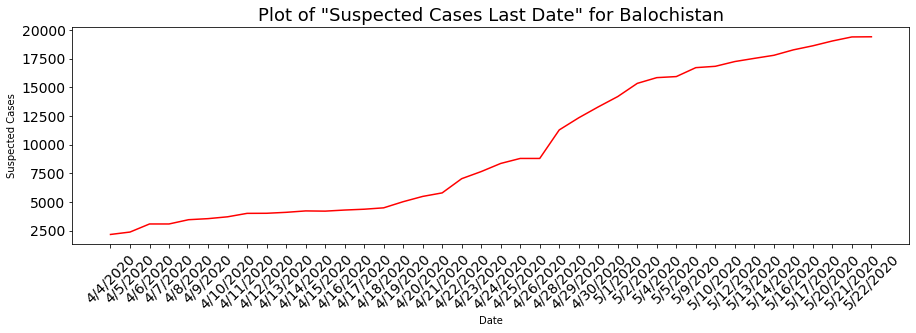

In [19]:
suspect('Suspected Cases Last Date','Balochistan','red')

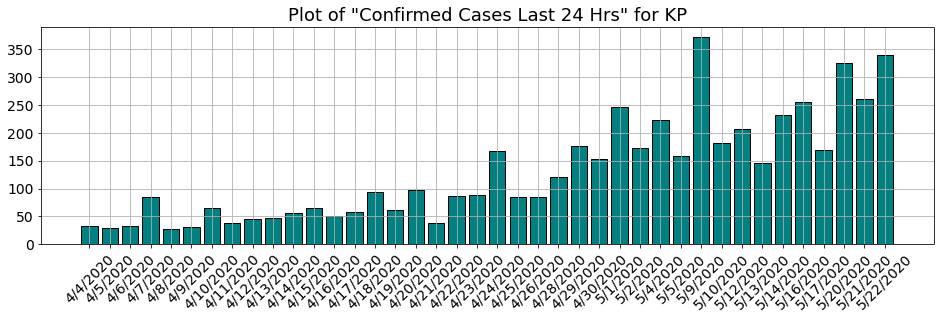

In [20]:
confirmed_cases('Confirmed Cases Last 24 Hrs','KP','teal')

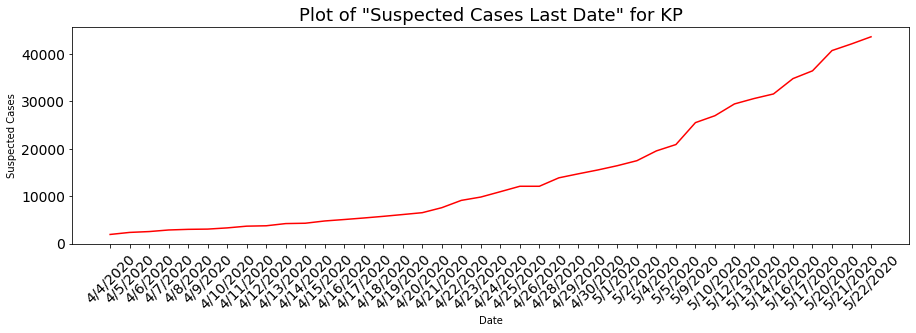

In [21]:
suspect('Suspected Cases Last Date','KP','red')

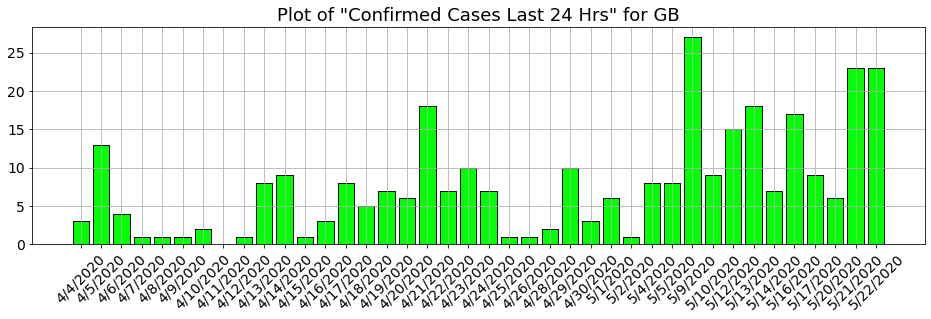

In [22]:
confirmed_cases('Confirmed Cases Last 24 Hrs','GB','lime')

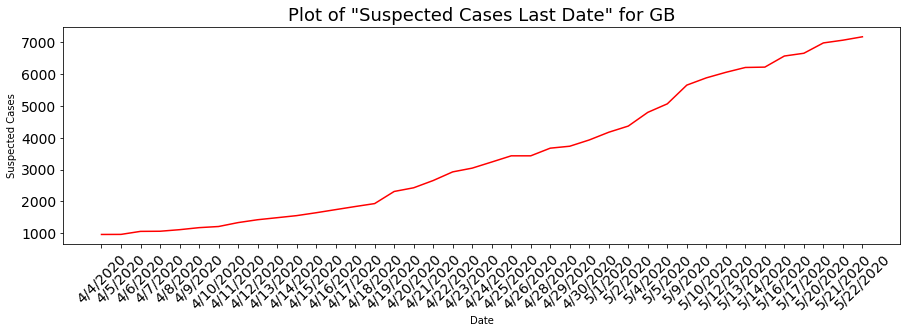

In [23]:
suspect('Suspected Cases Last Date','GB','red')

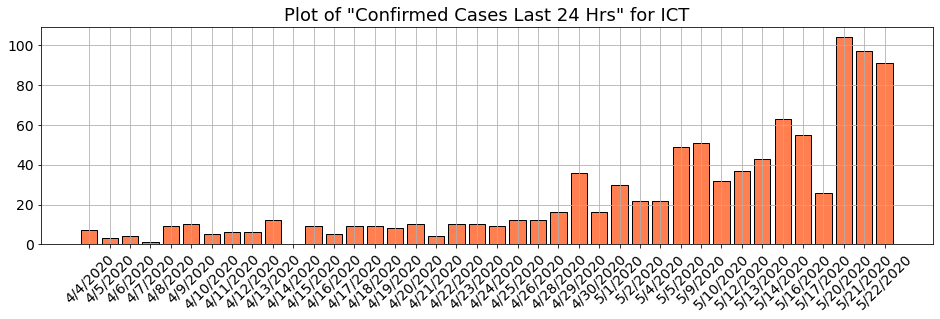

In [24]:
confirmed_cases('Confirmed Cases Last 24 Hrs','ICT','coral')

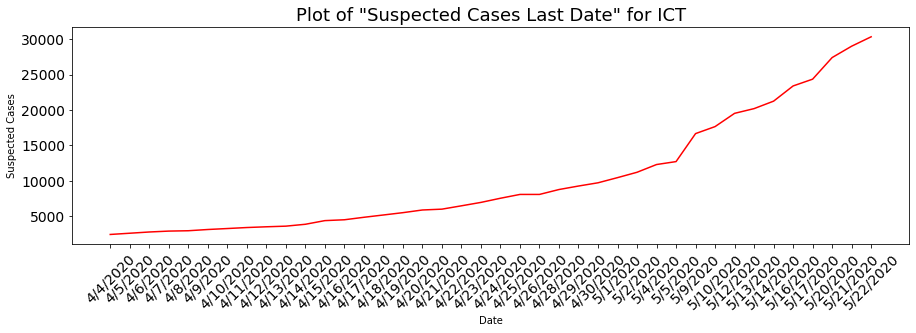

In [25]:
suspect('Suspected Cases Last Date','ICT','red')

## Comparision of cases

In [26]:
def death(var,province,col):
    
    y = df[df['Province Old']==province][var]
    x = df[df['Province Old']==province]['Date']
  
    plt.figure(figsize=(15,4))
    plt.title("Plot of \"{}\" for {}".format(var,province),fontsize=18)
    # plotting the points 
    plt.plot(x, y,col)
  
    # naming the x axis
    plt.xlabel('Date')
    # naming the y axis
    plt.ylabel('Suspected Cases')
   
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)

    # function to show the plot
    plt.show()

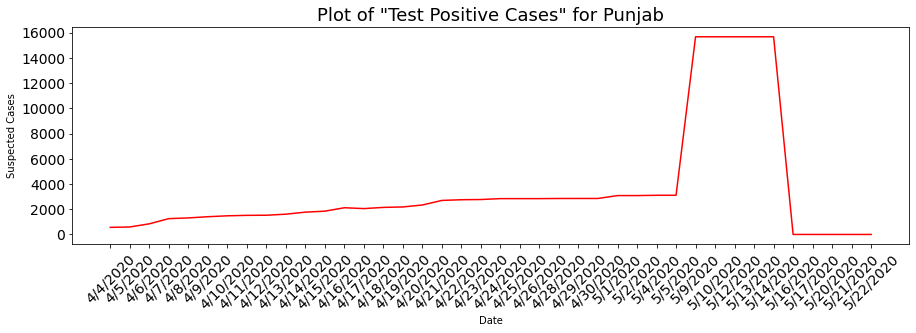

In [27]:
death('Test Positive Cases','Punjab','red')

In [28]:
def death_recovered(var,province,col,var2,col2):
    
    y = df[df['Province Old']==province][var]
    x = df[df['Province Old']==province]['Date']
    
    y1 = df[df['Province Old']==province][var2]
    x1 = df[df['Province Old']==province]['Date']
  
    
    plt.figure(figsize=(15,4))
    plt.title("Plot of \"{}\" and {} for {}".format(var2,var,province),fontsize=18)
    # plotting the points 
    plt.plot(x, y,col)
    plt.plot(x1, y1,col2)
  
    # naming the x axis
    plt.xlabel('Date')
    # naming the y axis
    plt.ylabel('Deaths Last 24 Hrs')
   
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)

    # function to show the plot
    plt.show()

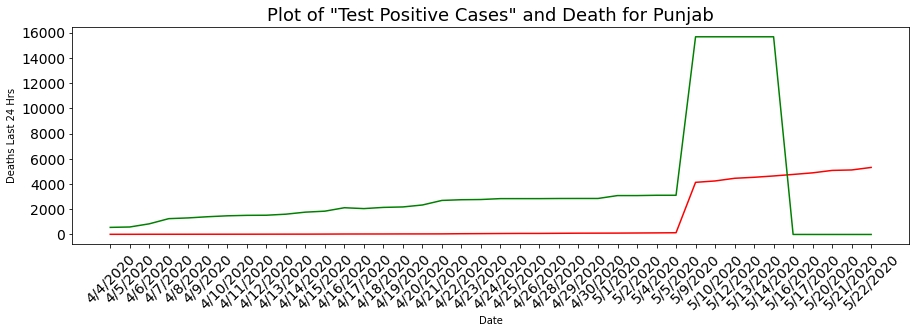

In [29]:
death_recovered('Death','Punjab','red','Test Positive Cases','green')

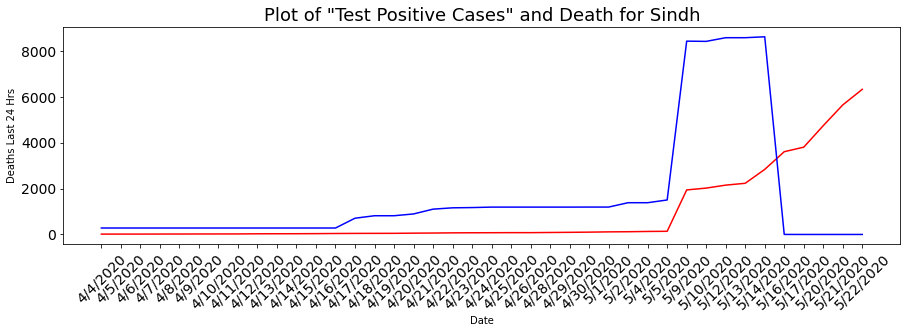

In [30]:
death_recovered('Death','Sindh','red','Test Positive Cases','blue')

# Forecasting next 10 days Positivity rate

## Through Data Modelling

In [31]:
dates = df['Date']
dates

0       4/4/2020
1       4/4/2020
2       4/4/2020
3       4/4/2020
4       4/4/2020
         ...    
275    5/22/2020
276    5/22/2020
277    5/22/2020
278    5/22/2020
279    5/22/2020
Name: Date, Length: 280, dtype: object

### data for prediction would be no of positive cases in the duration 

### Predicting for Punjab 

In [32]:
new_cases=df['Confirmed Cases Last 24 Hrs']
print(new_cases)

0         2
1         6
2         3
3         7
4        32
       ... 
275      23
276      91
277     340
278    1073
279     960
Name: Confirmed Cases Last 24 Hrs, Length: 280, dtype: int64


In [33]:
import datetime

start= '4/4/2020'
start_date = datetime.datetime.strptime(start ,'%m/%d/%Y')
future_predict_dates= []


### cumalating the total cases in punjab for the period

In [34]:
punjab_cases=[]
province='Punjab'
var="Confirmed Cases Last 24 Hrs"
new=df[df['Province Old']==province][var]
length=len(new)
i=0
asum=0
#print(new)
while i<length:

    asum=new.iloc[i]+asum
    punjab_cases.append(asum)
    i=i+1
    
print(punjab_cases)

[152, 243, 573, 998, 1110, 1251, 1359, 1416, 1505, 1674, 1906, 2025, 2297, 2356, 2471, 2729, 2801, 3275, 3537, 3714, 3993, 4325, 4657, 4851, 5038, 5272, 5551, 5944, 6362, 6941, 7379, 8001, 8302, 9658, 9994, 10281, 10664, 11373, 12070, 13143]


In [35]:
province='Punjab'
x = df[df['Province Old']==province]['Date']
len(x)

40

In [36]:
futurepred_days=10
days10_pred = np.array([i for i in range(len(x))]).reshape(-1,1)
days10_pred

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39]])

In [38]:
predFuture = np.array([i for i in range(len(x)+futurepred_days)]).reshape(-1,1)
predFuture

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49]])

In [39]:
start= '5/22/2020'
start_date = datetime.datetime.strptime(start ,'%m/%d/%Y')
future_predict_dates= []
for i in range(len(predFuture)):
    future_predict_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math 
import time
from sklearn.model_selection import train_test_split
import datetime



## Using DecisionTree

In [41]:
from sklearn.tree import DecisionTreeClassifier
i=30

model = DecisionTreeClassifier(random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(days10_pred, punjab_cases, test_size=0.3)
model.fit(X_train, Y_train)
DT1 = model.predict(predFuture)
while i<40:
    print(DT1[i])
    i=i+1

6941
8302
8302
9658
9994
10281
10664
11373
11373
11373


## Using Naive Bayes

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
i=29

X_train, X_test, y_train, y_test = train_test_split(days10_pred, punjab_cases)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
NP=gnb.predict(predFuture)

while i<39:
    print(NP[i])
    i=i+1

6362
7379
8001
8302
9658
9994
10281
10281
11373
12070


In [43]:
total_case_pos=DT1.sum()
total_case_pos

300777

### punjab positiveity rate for the upcoming 10 days


In [44]:
total_test=5300*10
pos_ratio = total_case_pos/total_test
print("Total Prediction for Punjab for the upcoming 10 days: ",pos_ratio)

Total Prediction for Punjab for the upcoming 10 days:  5.675037735849057


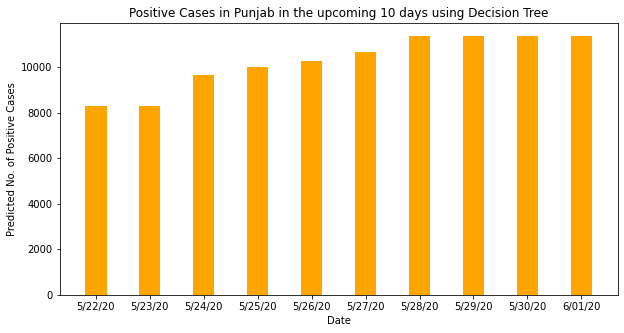

In [45]:
data = {'5/22/20':DT1[31],'5/23/20':DT1[32],'5/24/20':DT1[33],
       '5/25/20':DT1[34],'5/26/20':DT1[35],'5/27/20':DT1[36],
        '5/28/20':DT1[37],'5/29/20':DT1[38],'5/30/20':DT1[39],
        '6/01/20':DT1[40]
       }

date = list(data.keys())
case = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(date, case, color ='orange',
        width = 0.4)
 
plt.xlabel("Date")
plt.ylabel("Predicted No. of Positive Cases")
plt.title("Positive Cases in Punjab in the upcoming 10 days using Decision Tree")
plt.show()

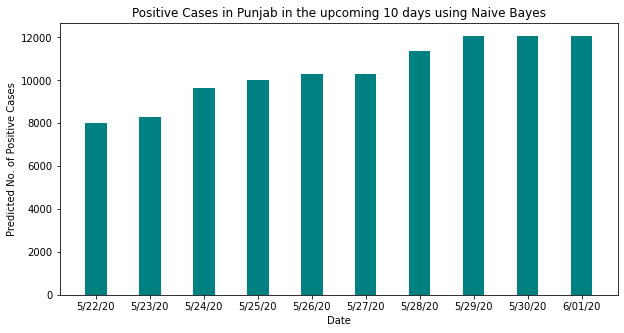

In [46]:
data = {'5/22/20':NP[31],'5/23/20':NP[32],'5/24/20':NP[33],
       '5/25/20':NP[34],'5/26/20':NP[35],'5/27/20':NP[36],
        '5/28/20':NP[37],'5/29/20':NP[38],'5/30/20':NP[39],
        '6/01/20':NP[40]
       }

date = list(data.keys())
case = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(date, case, color ='teal',
        width = 0.4)
 
plt.xlabel("Date")
plt.ylabel("Predicted No. of Positive Cases")
plt.title("Positive Cases in Punjab in the upcoming 10 days using Naive Bayes")
plt.show()

## Prediction of cases in KP 

In [47]:
start= '4/4/2020'
start_date = datetime.datetime.strptime(start ,'%m/%d/%Y')
future_dates= []

In [48]:
kp_cases=[]
province='KP'
var="Confirmed Cases Last 24 Hrs"
new=df[df['Province Old']==province][var]
length=len(new)
i=0
Sum=0
#print(new)
while i<length:

    Sum=new.iloc[i]+Sum
    kp_cases.append(Sum)
    i=i+1
    
print(kp_cases)

[32, 61, 94, 179, 206, 237, 302, 341, 386, 433, 489, 554, 604, 662, 755, 817, 915, 954, 1040, 1128, 1295, 1380, 1465, 1585, 1761, 1914, 2160, 2332, 2554, 2713, 3084, 3266, 3472, 3618, 3849, 4104, 4273, 4597, 4858, 5198]


In [49]:
province='KP'
x = df[df['Province Old']==province]['Date']
len(x)

40

In [50]:
day_predicition=10
pred_10days = np.array([i for i in range(len(x))]).reshape(-1,1)
pred_10days

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39]])

In [52]:
future= np.array([i for i in range(len(x)+day_predicition)]).reshape(-1,1)
future

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49]])

### Using DecisionTree Model to predict cases in KP 

In [68]:
from sklearn.tree import DecisionTreeClassifier
i=21
model = DecisionTreeClassifier(random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(pred_10days, kp_cases, test_size=0.3)
model.fit(X_train, Y_train)
DT2 = model.predict(future)
DT2
while i<31:
    print(DT2[i])
    i=i+1

1380
1465
1585
1761
1761
2160
2160
2554
2554
3084


### using Naive bayes to predict cases in KP

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
i=21

X_train, X_test, y_train, y_test = train_test_split(pred_10days, kp_cases)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
NP2=gnb.predict(future)

while i<31:
    print(NP2[i])
    i=i+1

1295
1465
1585
1761
1761
2332
2332
2332
2713
2713


### kp positivity rate in next 10 days 

In [64]:
Total_pos_cases=DT2.sum()
Total_pos_cases

110146

In [65]:
total_tests=2500*10
cases_kp = Total_pos_cases/total_tests
cases_kp

4.40584

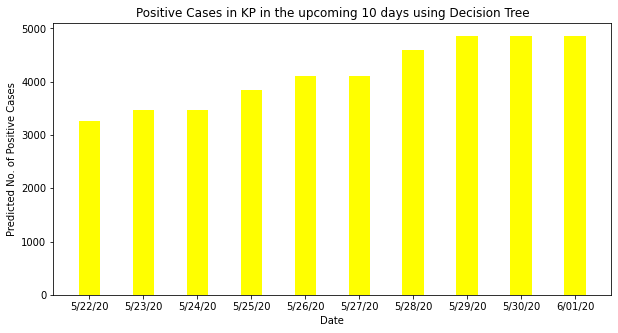

In [69]:
data = {'5/22/20':DT2[31],'5/23/20':DT2[32],'5/24/20':DT2[33],
       '5/25/20':DT2[34],'5/26/20':DT2[35],'5/27/20':DT2[36],
        '5/28/20':DT2[37],'5/29/20':DT2[38],'5/30/20':DT2[39],
        '6/01/20':DT2[40]
       }

date = list(data.keys())
model = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(date, model, color ='yellow',
        width = 0.4)
 
plt.xlabel("Date")
plt.ylabel("Predicted No. of Positive Cases")
plt.title("Positive Cases in KP in the upcoming 10 days using Decision Tree")
plt.show()

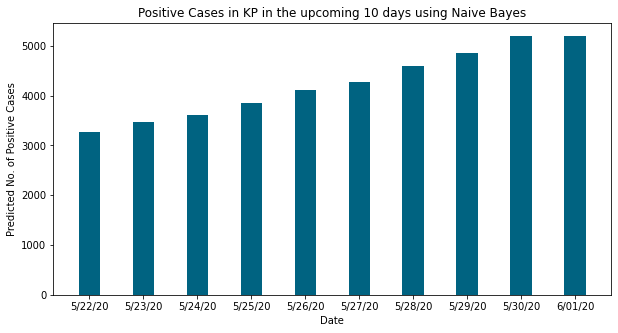

In [67]:
data = {'5/22/20':NP2[31],'5/23/20':NP2[32],'5/24/20':NP2[33],
       '5/25/20':NP2[34],'5/26/20':NP2[35],'5/27/20':NP2[36],
        '5/28/20':NP2[37],'5/29/20':NP2[38],'5/30/20':NP2[39],
        '6/01/20':NP2[40]
       }

date = list(data.keys())
model = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(date, model, color ='#006381',
        width = 0.4)
 
plt.xlabel("Date")
plt.ylabel("Predicted No. of Positive Cases")
plt.title("Positive Cases in KP in the upcoming 10 days using Naive Bayes")
plt.show()